Skill Demand

In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import matplotlib.ticker as ticker
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

d:\Anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [4]:
df['job_title_short'].value_counts()

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
Name: count, dtype: int64

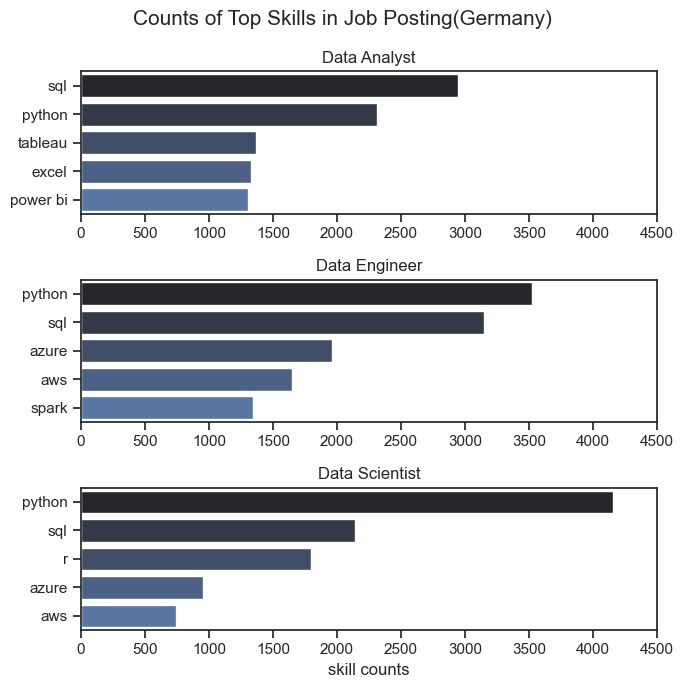

In [16]:
df_GER = df[df['job_country'] == 'Germany'].copy()
df_skills = df_GER.explode('job_skills')

df_skill_count_Ger = df_skills.groupby(['job_title_short','job_skills']).size()
df_skill_count_Ger = df_skill_count_Ger.reset_index(name='skill counts').sort_values(by='skill counts',ascending=False)


job_titles = ['Data Analyst','Data Engineer','Data Scientist']

sns.set_theme(style='ticks')
fig, ax = plt.subplots(3,1, figsize=(7, 7))

for i,job_titles in enumerate(job_titles):
    df_Ger_plot = df_skill_count_Ger[df_skill_count_Ger['job_title_short'] == job_titles].head(5)
    #df_Ger_plot.plot(kind='barh', x='job_skills', y='skill counts', ax=ax[i], title=job_titles)
    sns.barplot(data=df_Ger_plot, x='skill counts', y='job_skills', ax=ax[i], hue='job_skills', palette='dark:b')
    #ax[i].invert_yaxis()
    ax[i].set_xlim(0,4500)
    ax[i].set_ylabel("")
    ax[0].set_xlabel("")
    ax[1].set_xlabel("")
    ax[i].set_title(job_titles, fontsize=12)
    
plt.suptitle('Counts of Top Skills in Job Posting(Germany)', fontsize=15)
plt.tight_layout()
plt.show()


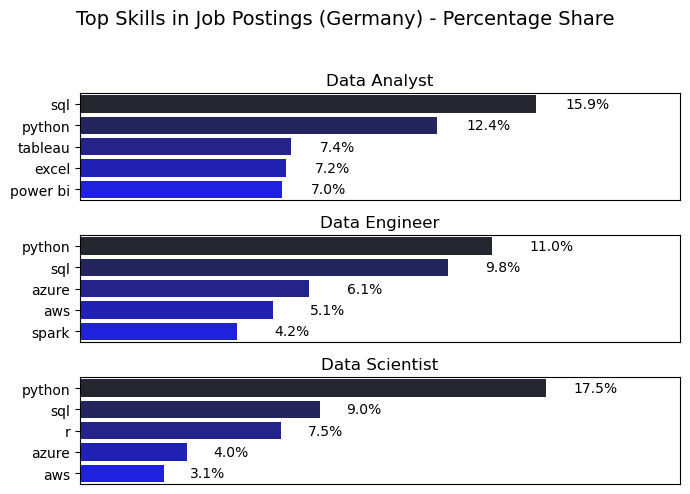

In [15]:
# Copy DataFrame and explode job skills
df_GER = df[df['job_country'] == 'Germany'].copy()
df_skills = df_GER.explode('job_skills')

# Count occurrences of each skill per job title
df_skill_count_Ger = df_skills.groupby(['job_title_short', 'job_skills']).size().reset_index(name='skill_count')

# Compute percentage
df_skill_count_Ger['percentage'] = df_skill_count_Ger.groupby('job_title_short')['skill_count'].transform(lambda x: (x / x.sum()) * 100)

# Define job titles
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

fig, ax = plt.subplots(3, 1, figsize=(7, 5))  # Adjust figure size

for i, job_title in enumerate(job_titles):
    df_Ger_plot = df_skill_count_Ger[df_skill_count_Ger['job_title_short'] == job_title].nlargest(5, 'percentage')  # Top 5 skills

    # Create barplot using percentage instead of count
    sns.barplot(data=df_Ger_plot, x='percentage', y='job_skills', ax=ax[i], hue="job_skills", palette='dark:b', legend=False)


    # Adjust X-axis to fit max values
    ax[i].set_xlim(0, df_Ger_plot['percentage'].max() + 5)  # Add small padding

    # Remove unnecessary labels to save space
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].set_title(job_title, fontsize=12)
    ax[i].set_xticks([])

    # Add percentage labels inside bars
    for j, (skill, percent) in enumerate(zip(df_Ger_plot['job_skills'], df_Ger_plot['percentage'])):
        ax[i].text(percent + 1, j, f"{percent:.1f}%", va='center', fontsize=10)

   


# Adjust spacing
plt.subplots_adjust(hspace=0.4)  # Reduce vertical gap between plots
plt.suptitle('Top Skills in Job Postings (Germany) - Percentage Share', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Make layout tighter

plt.show()